# Εργασία στην Αναγνώρηση Προτύπων και Μηχανική Μάθηση
## Μέρη Α-Γ
## ΕΠΙΜΕΛΕΙΑ :
* Ομάδα 25
* Γουρδομιχάλης Αναστάσιος 10333
* Πίττης Γεώργιος 10586

---

# ΜΕΡΟΣ Α
## Η κλάση του ταξινομητή Μέγιστης Πιθανοφάνειας

In [1]:
import numpy as np
import matplotlib.pyplot as plt


class Classifier:
    def __init__(self):
        self.theta1 = None
        self.theta2 = None

    def log_p_D_theta(self, theta, D):
        """
        Υπολογίζει τη λογαριθμική συνάρτηση πιθανοφάνειας log(p(D|θ)).

        Args:
        - theta: Υποψήφια τιμή για το θ.
        - D: Τα δεδομένα της κλάσης (λίστα ή numpy array).

        Returns:
        - Η λογαριθμική πιθανοφάνεια log(p(D|θ)).
        """
        log_p_D_theta = 0
        for x_i in D:
            denominator = np.pi * (1 + (x_i - theta) ** 2)
            log_p_D_theta += np.log(1 / denominator)
        return log_p_D_theta

    def fit(self, D, theta_candidates):
        """
        Εκπαιδεύει το μοντέλο για μία κλάση με μέγιστη πιθανοφάνεια.

        Args:
        - D: Τα δεδομένα της κλάσης (λίστα ή numpy array).
        - theta_candidates: Ένα διάνυσμα από υποψήφιες τιμές θ (numpy array).

        Returns:
        - Η τιμή του θ που μεγιστοποιεί την πιθανοφάνεια.
        """
        log_likelihoods = []

        # Υπολογίζουμε τη λογαριθμική πιθανοφάνεια για κάθε υποψήφιο θ
        for theta in theta_candidates:
            log_likelihood = self.log_p_D_theta(theta, D)
            log_likelihoods.append(log_likelihood)

        # Βρίσκουμε το θ που αντιστοιχεί στη μέγιστη πιθανοφάνεια
        max_index = np.argmax(log_likelihoods)
        return theta_candidates[max_index], log_likelihoods

    def predict(self, D, prior1, prior2):
        """
        Υπολογίζει τις τιμές της συνάρτησης g(x) για ταξινόμηση.

        Args:
        - D: Το σύνολο δεδομένων (λίστα ή numpy array).
        - prior1: Η a-priori πιθανότητα της κλάσης ω1.
        - prior2: Η a-priori πιθανότητα της κλάσης ω2.

        Returns:
        - Ένα διάνυσμα με τις τιμές g(x).
        """
        g_values = []
        for x_i in D:
            g1 = np.log(1 / (np.pi * (1 + (x_i - self.theta1) ** 2))) + np.log(prior1)
            g2 = np.log(1 / (np.pi * (1 + (x_i - self.theta2) ** 2))) + np.log(prior2)
            g = g1 - g2
            g_values.append(g)
        return np.array(g_values)

## 1ο Ερώτημα :   
### α) Εκτίμηση παραμέτρων θ1 και θ2 με την μέθοδο της μέγιστης πιθανοφάνειας

In [2]:
# Δεδομένα των δύο κλάσεων
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]  # Κλάση ω1
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]  # Κλάση ω2

# Υποψήφιες τιμές θ
theta_candidates = np.linspace(-5, 5, 500)

# A-priori πιθανότητες
prior1 = len(D1) / (len(D1) + len(D2))  # P(ω1) = 7/12
prior2 = len(D2) / (len(D1) + len(D2))  # P(ω2) = 5/12

# Δημιουργία του ταξινομητή
classifier = Classifier()

# Εκπαίδευση για τις δύο κλάσεις
classifier.theta1, log_p_D1 = classifier.fit(D1, theta_candidates)  # βρίσκω θ_1 που μεγιστοποιεί την log( p(D1|θ_1) )
classifier.theta2, log_p_D2 = classifier.fit(D2, theta_candidates)  # βρίσκω θ_2 που μεγιστοποιεί την log( p(D2|θ_2) )

# Εκτύπωση αποτελεσμάτων
print(f"Εκτίμηση θ1 (ω1) για μέγιστη πιθανοφάνεια: {classifier.theta1:.4f}")
print(f"Εκτίμηση θ2 (ω2) για μέγιστη πιθανοφάνεια: {classifier.theta2:.4f}")

Εκτίμηση θ1 (ω1) για μέγιστη πιθανοφάνεια: 2.5952
Εκτίμηση θ2 (ω2) για μέγιστη πιθανοφάνεια: -3.1563


### β) Απεικόνιση των κυματομορφών log*p(D1|θ)* και log*p(D2|θ)* σε συνάρτηση με τη παράμετρο θ
* Χρησιμοποιήσαμε τον φυσικό λογάριθμο (ln)

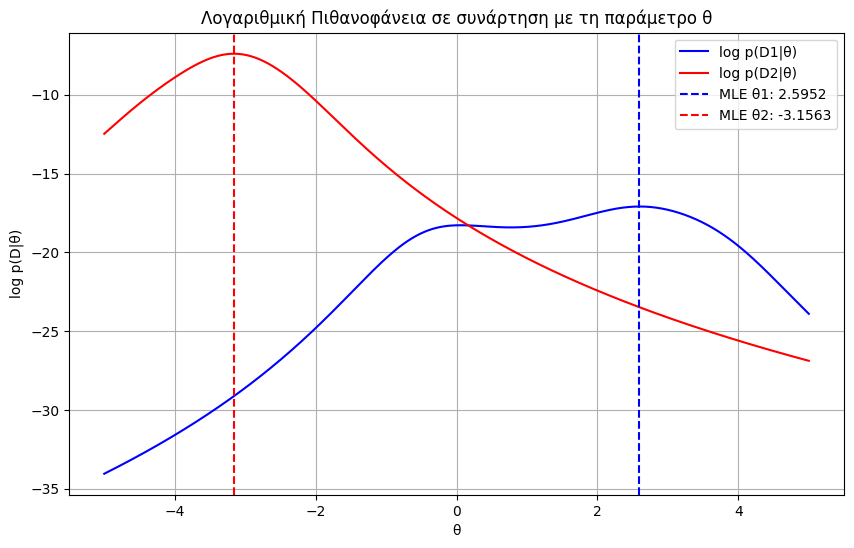

In [3]:
# Γραφήματα
plt.figure(figsize=(10, 6))
plt.plot(theta_candidates, log_p_D1, label="log p(D1|θ)", color="blue")
plt.plot(theta_candidates, log_p_D2, label="log p(D2|θ)", color="red")
plt.axvline(x=classifier.theta1, color="blue", linestyle="--", label=f"MLE θ1: {classifier.theta1:.4f}")
plt.axvline(x=classifier.theta2, color="red", linestyle="--", label=f"MLE θ2: {classifier.theta2:.4f}")
plt.title("Λογαριθμική Πιθανοφάνεια σε συνάρτηση με τη παράμετρο θ")
plt.xlabel("θ")
plt.ylabel("log p(D|θ)")
plt.legend()
plt.grid()
plt.show()

### Δημιουργία επιπλέον διαγραμμάτων 

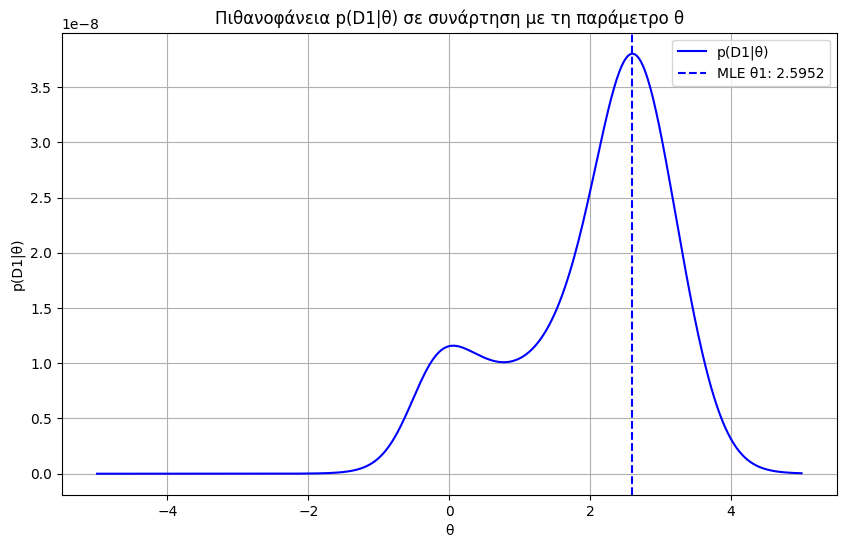

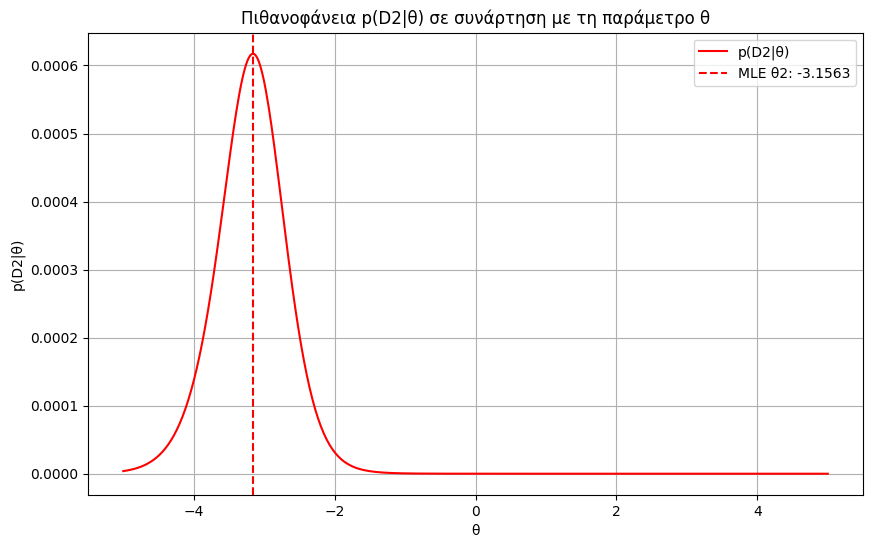

In [4]:
# Υπολογισμός των p(D|θ) από τις log-likelihoods
p_D1 = np.exp(log_p_D1)
p_D2 = np.exp(log_p_D2)

# Διάγραμμα για p(D1|θ)
plt.figure(figsize=(10, 6))
plt.plot(theta_candidates, p_D1, label="p(D1|θ)", color="blue")
plt.axvline(x=classifier.theta1, color="blue", linestyle="--", label=f"MLE θ1: {classifier.theta1:.4f}")
plt.title("Πιθανοφάνεια p(D1|θ) σε συνάρτηση με τη παράμετρο θ")
plt.xlabel("θ")
plt.ylabel("p(D1|θ)")
plt.legend()
plt.grid()
plt.show()

# Διάγραμμα για p(D2|θ)
plt.figure(figsize=(10, 6))
plt.plot(theta_candidates, p_D2, label="p(D2|θ)", color="red")
plt.axvline(x=classifier.theta2, color="red", linestyle="--", label=f"MLE θ2: {classifier.theta2:.4f}")
plt.title("Πιθανοφάνεια p(D2|θ) σε συνάρτηση με τη παράμετρο θ")
plt.xlabel("θ")
plt.ylabel("p(D2|θ)")
plt.legend()
plt.grid()
plt.show()

##### Στα παραπάνω διαγράμματα, φαίνεται ξεκάθαρα ότι τα θ1 και θ2 που υπολογίσαμε, μεγιστοποιούν τις συναρτήσεις πιθανοφάνειας p(D1|θ) και p(D2|θ).

## 2ο Ερώτημα :
### Χρήση της συνάρτησης διάκρισης g(x) για τη ταξινόμηση των 2 συνόλων τιμών D1 και D2

Τιμές της συνάρτησης g(x): [ 3.8920812   0.18821823 -0.31163717  3.67950825  0.3123505   3.48114037
  3.13593771 -2.5704513  -3.21519804 -3.16997071 -3.11464563 -2.33090749]


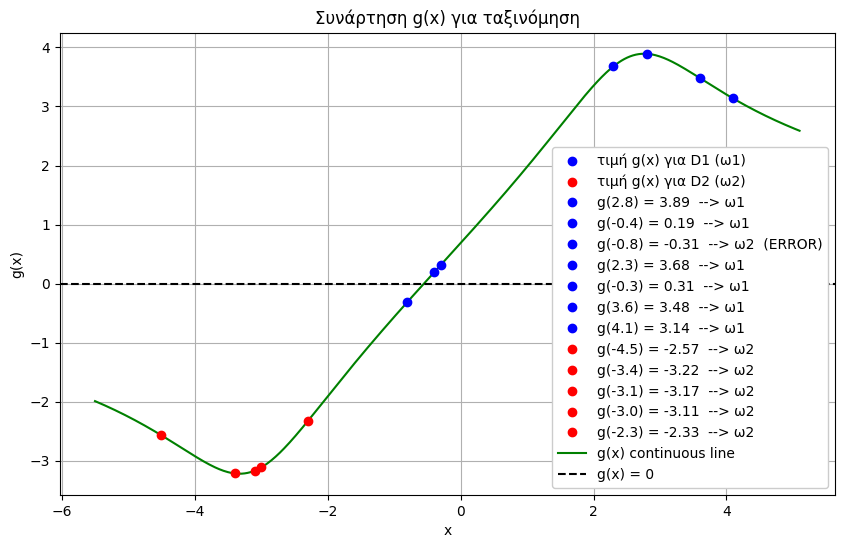

In [5]:
# Υπολογισμός g(x) για όλα τα δεδομένα
data = np.array(D1 + D2)
g_values = classifier.predict(data, prior1, prior2)  # υπολογίζω όλες τις τιμές της discriminant function g(x)
# και για τα 2 datasets D1 και D2

print("Τιμές της συνάρτησης g(x):", g_values)

# Δημιουργία εύρους για το x
x_range = np.linspace(min(data) - 1, max(data) + 1, 500)

# Υπολογισμός g(x) για κάθε τιμή του x_range
g_continuous = classifier.predict(x_range, prior1, prior2)

# Διάγραμμα της g(x)
plt.figure(figsize=(10, 6))

# Διακριτά δεδομένα (χωριστά για D1 και D2, μπλε και κόκκινες κουκίδες)
plt.scatter(D1, g_values[:len(D1)], c='blue', label='τιμή g(x) για D1 (ω1)', zorder=5)  # μπλε κουκίδες για D1
plt.scatter(D2, g_values[len(D1):], c='red', label='τιμή g(x) για D2 (ω2)', zorder=5)  # κόκκινες κουκίδες για D2

# Προσθέτω labels για καλύτερη κατανόηση του διαγράμματος της g(x)
for i, x in enumerate(D1):
    # Ελέγχω για λανθασμένη ταξινόμηση το δείγμα x == -0.8
    if x == -0.8:
        label = f'g({x}) = {g_values[i]:.2f}  --> ω2  (ERROR)'
    else:
        label = f'g({x}) = {g_values[i]:.2f}  --> ω1' if g_values[i] > 0 else f'g({x}) = {g_values[i]:.2f}  --> ω2'

    plt.plot([], [], 'bo', label=label)

for i, x in enumerate(D2):
    label = f'g({x}) = {g_values[len(D1) + i]:.2f}  --> ω1' if g_values[len(D1) + i] > 0 else f'g({x}) = {g_values[len(D1) + i]:.2f}  --> ω2'
    plt.plot([], [], 'ro', label=label)

# Συνεχής γραμμή της g(x)
plt.plot(x_range, g_continuous, color='green', label='g(x) continuous line')

# Γραμμή y=0 (είναι το ΟΡΙΟ για τη διάκριση των κλάσεων)
plt.axhline(0, color='black', linestyle='--', label='g(x) = 0')

# Τίτλοι και labels
plt.title("Συνάρτηση g(x) για ταξινόμηση")
plt.xlabel("x")
plt.ylabel("g(x)")

plt.legend(framealpha=1)

plt.grid()
plt.show()

#### Παρατηρούμε ότι το δείγμα x = -0,8 του συνόλου D1 ταξινομείται λανθασμένα στη κλάση ω2.

---

# ΜΕΡΟΣ Β
## H κλάση του Μπεϋζιανού ταξινομητή

In [6]:
import numpy as np
import matplotlib.pyplot as plt


class Classifier:
    def __init__(self):  # Κενός constructor
        pass

    # Συνάρτηση a-posteriori πιθανότητας p(x|θ)
    def p_x_given_theta(self, x, theta):  # το x είναι αριθμός και όχι πίνακας με πολλές τιμές x.
        return 1 / (np.pi * (1 + (x - theta) ** 2))  # τύπος από εκφώνηση

    # Υπολογισμός της πιθανοφάνειας p(D|θ)
    def p_D_given_theta(self, D, theta):  # το theta είναι ένας αριθμός και όχι π΄ίνακας (έχω 1 theta κάθε φορά)
        likelihood = 1
        for x in D:  # για κάθε x του dataset D
            likelihood *= self.p_x_given_theta(x, theta)  # p(D|θ) = p(x_1|θ) * p(x_2|θ) * p(x_3|θ) * ...
        return likelihood

    # Υπολογισμός της a-priori πιθανότητας p(θ) (Cauchy κατανομή)
    def prior(self, theta):  # το theta μπορεί να είναι αριθμός αλλά μπορεί να είναι και πίνακας με πολλά theta.
        return 1 / (10 * np.pi * (1 + (theta / 10) ** 2))  # τύπος από εκφώνηση

    def integral_calc(self, f, x):  # Συνάρτηση που υλοποιεί τον κανόνα του τραπεζίου
        # Δx = dx είναι το διάστημα (δηλ. η απόσταση) μεταξύ 2 διαδοχικών τιμών του x.
        dx = x[1] - x[0]  # Εναλλακτικά : dx = (x[-1]-x[0]) / (len(x) - 1)

        # Εφαρμόζω κανόνα τραπεζίου
        integral = 0.5 * (f[0] + f[-1])
        integral += np.sum(f[1:-1])
        # Multiply by Δx to account for the spacing
        integral *= dx
        return integral

    # Υπολογισμός της πιθανότητας p(θ|D)
    def p_theta_given_D(self, D, theta):
        # Υπολογίζουμε την πιθανοφάνεια p(D|θ) για κάθε θ
        # έχω θεωρήσει πολλά θ : theta = np.linspace(-10, 10, 1000)
        p_D_theta = np.array([self.p_D_given_theta(D, t) for t in theta])  # Προκύπτει πίνακας
        prior_values = self.prior(theta)  # Υπολογίζουμε την prior p(θ)
        # Προκύπτει πίνακας

        # Αριθμητής : p(D|θ) * p(θ)
        numerator = p_D_theta * prior_values

        # Υπολογισμός του ολοκληρώματος στον παρονομαστή με τον κανόνα του τραπεζίου.
        denominator = self.integral_calc(numerator, theta)  # o παρανομαστης
        p_theta_given_D = numerator / denominator

        return p_theta_given_D  # το ζητούμενο p(D|θ)
        # Αν βάλω ως όρισμα εισόδου το D1 τότε θα πάρω p(D1|θ)
        # Αν βάλω ως όρισμα εισόδου το D2 τότε θα πάρω p(D2|θ)

    # Υπολογισμός της πιθανότητας p(x|D)
    def p_x_given_D(self, D, x, theta):  # το x είναι αριθμός και όχι πίνακας με πολλές τιμές x.

        # Υπολογισμός της ποσότητας ΜΕΣΑ στο ολοκλήρωμα σε p(x|D1) και p(x|D2).
        integral_func = self.p_x_given_theta(x, theta) * self.p_theta_given_D(D, theta)  # p(x|θ) * p(θ|D)
        return self.integral_calc(integral_func, theta)

    # Υπολογισμός των Discriminant Functions h1(x), h2(x) και της διαφοράς τους h(x)
    def predict(self, D1, D2, x_values, theta, P_omega1, P_omega2):
        h1_values = []  # εδώ θα αποθηκεύσω τις τιμές της h1
        h2_values = []  # εδώ θα αποθηκεύσω τις τιμές της h2
        h_values = []  # εδώ θα αποθηκεύσω τις τιμές της h = h1 - h2

        for x in x_values:  # το x_values είναι ένα μεγάλο εύρος x που καθορίζω εγώ.
            p_x_D1 = self.p_x_given_D(D1, x, theta)
            p_x_D2 = self.p_x_given_D(D2, x, theta)

            # Υπολογισμός των διακριτικών συναρτήσεων
            h1_x = np.log(p_x_D1) + np.log(P_omega1)
            h2_x = np.log(p_x_D2) + np.log(P_omega2)
            h_x = h1_x - h2_x

            # Αποθήκευση των τιμών
            h1_values.append(h1_x)
            h2_values.append(h2_x)
            h_values.append(h_x)

        return np.array(h_values)

## 1ο Ερώτημα :
### α) Υπολογίσαμε και απεικονίσαμε τις εκ των υστέρων πυκνότητες πιθανότητας p(θ|D1) και p(θ|D2). 

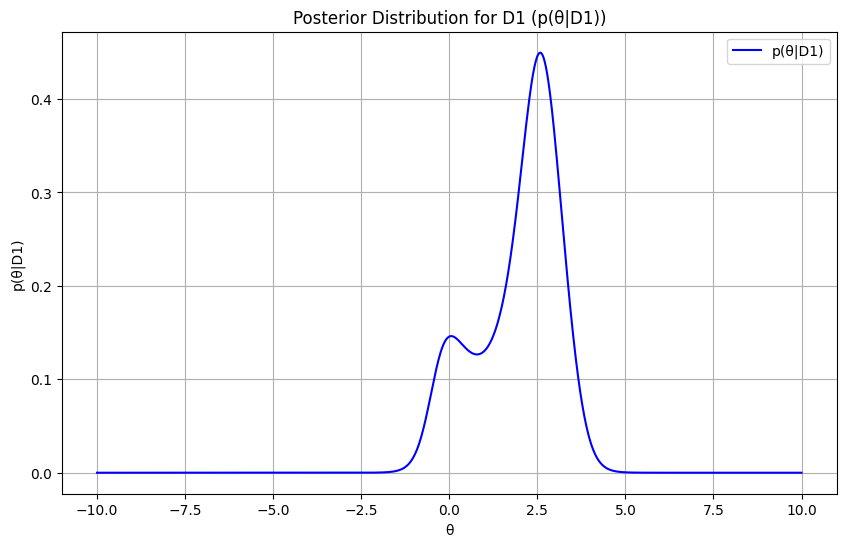

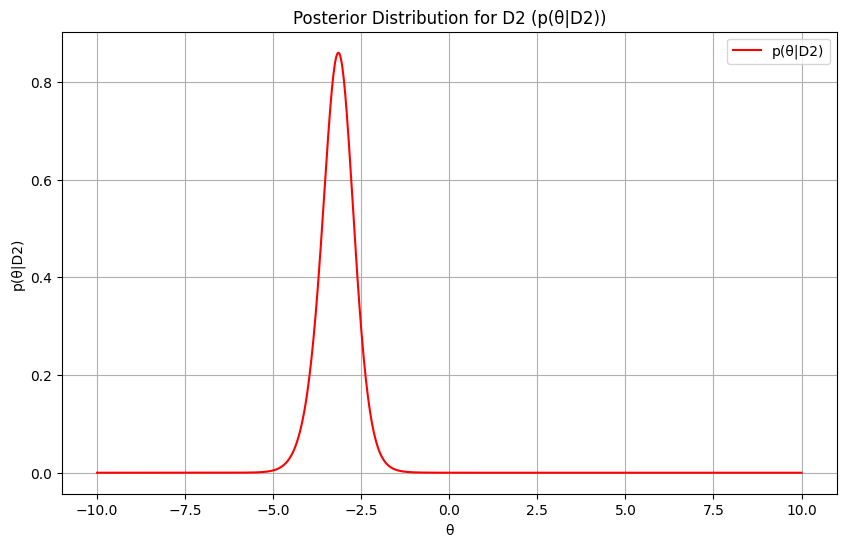

In [7]:
classifier = Classifier()  # Δημιουργία του ταξινομητή

# Τα datasets για την κλάση 1 και 2
D1 = [2.8, -0.4, -0.8, 2.3, -0.3, 3.6, 4.1]  # Κλάση ω1
D2 = [-4.5, -3.4, -3.1, -3.0, -2.3]  # Κλάση ω2

# Υποψήφιες τιμές θ για τον υπολογισμό της πιθανοφάνειας και της εκ των υστέρων πιθανότητας
theta = np.linspace(-10, 10, 1000)  # Καθορίζουμε εύρος τιμών για το θ.

x_values = np.linspace(-10, 10, 500)  # Καθορίζουμε εύρος τιμών για το x.

posterior_D1 = classifier.p_theta_given_D(D1, theta)  # p(θ|D1)
posterior_D2 = classifier.p_theta_given_D(D2, theta)  # p(θ|D2)

# Υπολογισμός P(ω1) και P(ω2)
P_omega1 = 7 / 12
P_omega2 = 5 / 12

plt.figure(figsize=(10, 6))

# Απεικονίζω p(θ|D1)
plt.plot(theta, posterior_D1, label="p(θ|D1)", color="blue")
plt.title("Posterior Distribution for D1 (p(θ|D1))")
plt.xlabel("θ")
plt.ylabel("p(θ|D1)")
plt.legend()
plt.grid(True)
plt.show()

# Απεικονίζω p(θ|D2)
plt.figure(figsize=(10, 6))
plt.plot(theta, posterior_D2, label="p(θ|D2)", color="red")
plt.title("Posterior Distribution for D2 (p(θ|D2))")
plt.xlabel("θ")
plt.ylabel("p(θ|D2)")
plt.legend()
plt.grid(True)
plt.show()

### β) Απεικονίσαμε και την εκ των προτέρων πιθανότητα p(θ).

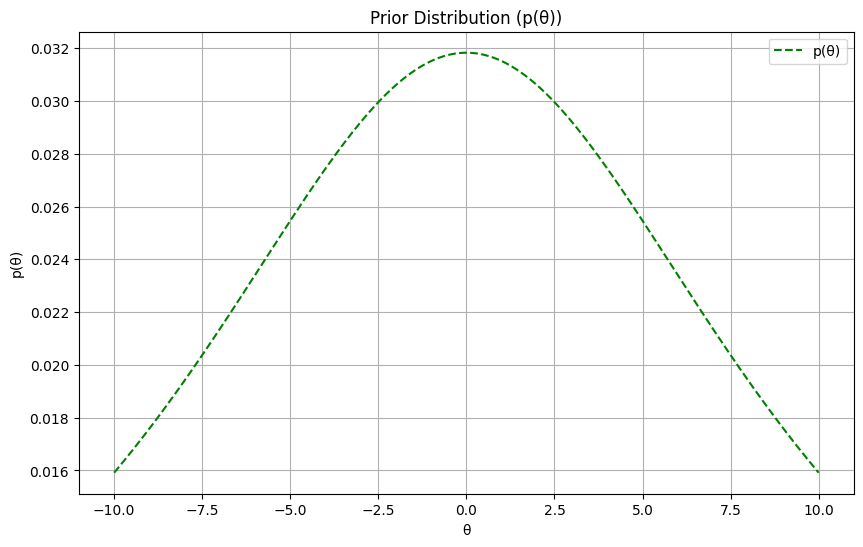

In [8]:
# Απεικονίζω τη prior distribution p(θ)
prior_values = classifier.prior(theta)
plt.figure(figsize=(10, 6))
plt.plot(theta, prior_values, label="p(θ)", color="green", linestyle="--")
plt.title("Prior Distribution (p(θ))")
plt.xlabel("θ")
plt.ylabel("p(θ)")
plt.legend()
plt.grid(True)
plt.show()

### γ) Απεικονίσαμε τις κατανομές p(θ|D1) , p(θ|D2) και p(θ) μαζί σε μια γραφική.

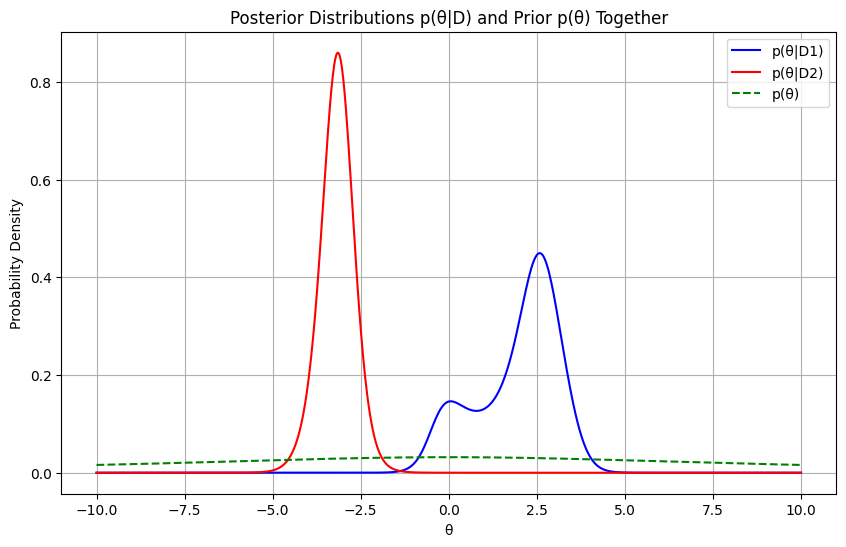

In [9]:
# Τώρα απεικονίζω όλες τις κατανομές μαζί σε μια γραφική.
plt.figure(figsize=(10, 6))

# Απεικονίζω μαζί τις p(θ|D1), p(θ|D2) και p(θ)
plt.plot(theta, posterior_D1, label="p(θ|D1)", color="blue")
plt.plot(theta, posterior_D2, label="p(θ|D2)", color="red")
plt.plot(theta, prior_values, label="p(θ)", color="green", linestyle="--")

# Τίτλοι και labels
plt.title("Posterior Distributions p(θ|D) and Prior p(θ) Together")
plt.xlabel("θ")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(True)

## 2ο Ερώτημα :
### Χρησιμοποιήσαμε τη συνάρτηση predict για να υπολογίσουμε τις τιμές της συνάρτησης διάκρισης h(x). 
### Με αυτόν τον τρόπο, ταξινομήσαμε τα 2 σύνολα τιμών D1 και D2.

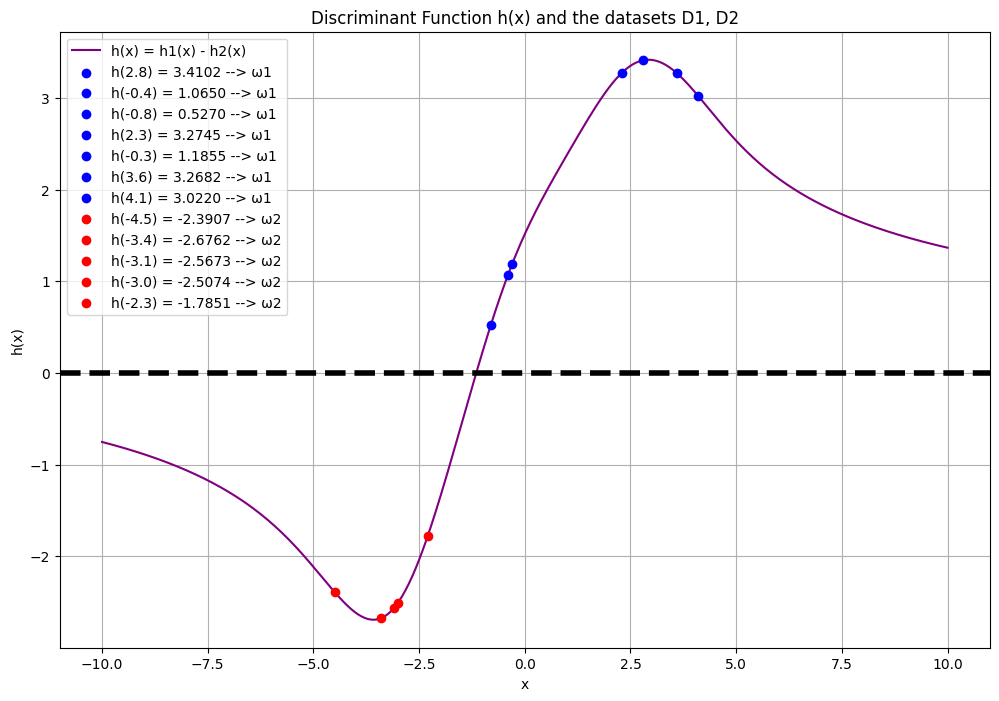

In [10]:
# Υπολογισμός των h(x)
h_values = classifier.predict(D1, D2, x_values, theta, P_omega1, P_omega2)

# Δημιουργία γραφήματος
plt.figure(figsize=(12, 8))

# Απεικόνιση της διακριτικής συνάρτησης h(x)
plt.plot(x_values, h_values, label="h(x) = h1(x) - h2(x)", color="purple", linestyle="-")

# Υπολογισμός και απεικόνιση των σημείων του D1 πάνω στη h(x)
for x in D1:
    # Υπολογίζω τα p(x|D1) και p(x|D2) μόνο για τα x του dataset D1
    # Αναγκαστικά, υπολογίζω τα p(x|D1) και p(x|D2) διότι υπάρχουν μέσα στον τύπο της h(x).
    p_x_D1 = classifier.p_x_given_D(D1, x, theta)
    p_x_D2 = classifier.p_x_given_D(D2, x, theta)

    # Υπολογίζω τη τιμή της h(x) μόνο για τα x του dataset D1.
    h_x = np.log(p_x_D1) + np.log(P_omega1) - (np.log(p_x_D2) + np.log(P_omega2))

    # Τοποθέτηση μπλε κουκκίδας για τα σημεία του D1
    # Έτσι, απεικονίζω με μπλε κουκκίδα τις τιμές της h(x) για τα x που ανήκουν στο D1.
    plt.scatter(x, h_x, color="blue", zorder=5)

    # Προσθήκη της τιμής g(x) ως label
    plt.scatter([], [], color="blue", label=f"h({x}) = {h_x:.4f} --> ω1")

# Υπολογισμός και απεικόνιση των σημείων του D2 πάνω στη h(x)
for x in D2:
    # Υπολογίζω τα p(x|D1) και p(x|D2) μόνο για τα x του dataset D2
    p_x_D1 = classifier.p_x_given_D(D1, x, theta)
    p_x_D2 = classifier.p_x_given_D(D2, x, theta)

    # Υπολογίζω τη τιμή της h(x) μόνο για τα x του dataset D2
    h_x = np.log(p_x_D1) + np.log(P_omega1) - (np.log(p_x_D2) + np.log(P_omega2))

    # Τοποθέτηση κόκκινης κουκκίδας για τα σημεία του D2
    # Έτσι, απεικονίζω με κόκκινη κουκκίδα τις τιμές της g(x) για τα x που ανήκουν στο D2.
    plt.scatter(x, h_x, color="red", zorder=5)

    # Προσθήκη της τιμής g(x) ως label
    plt.scatter([], [], color="red", label=f"h({x}) = {h_x:.4f} --> ω2")

# Ρυθμίσεις γραφήματος
plt.title("Discriminant Function h(x) and the datasets D1, D2")
plt.xlabel("x")
plt.ylabel("h(x)")
plt.axhline(0, color='black', linestyle='--', linewidth=4)  # Γραμμή στο y=0 για αναφορά
plt.legend(loc='best')
plt.grid(True)

# Εμφάνιση του γραφήματος
plt.show()  # Παρατηρώ ότι γίνεται ΣΩΣΤΗ ταξινόμηση των δειγμάτων στις κλάσεις ω1 και ω2.

### Παρατηρούμε ότι γίνεται ΣΩΣΤΗ ταξινόμηση των δειγμάτων των συνόλων D1 και D2 στις κλάσεις ω1 και ω2 αντίστοιχα.

---

# ΜΕΡΟΣ Γ
## 1η Ενότητα : 
### 1ο Ερώτημα :

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

# ==================== Ενότητα 1 =========================

# Φόρτωση των δεδομένων Iris
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

# Split the data into training and testing sets (50% each)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Initialize variables to store the best depth and best accuracy
best_depth = 0
best_accuracy = 0

# Loop over different depths (1 to 10) to find the best depth for the Decision Tree
for depth in range(1, 11):
    clf = DecisionTreeClassifier(random_state=42, max_depth=depth)  # Create the classifier
    clf.fit(X_train, y_train)  # Train the model using the training data
    y_pred = clf.predict(X_test)  # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy

    # If the current accuracy is better than the previous, store the new best accuracy and depth
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

# Train the best model using the optimal depth
clf_best = DecisionTreeClassifier(random_state=42, max_depth=best_depth)
clf_best.fit(X_train, y_train)

# Print the best accuracy and the corresponding model
print(f"ΕΝΟΤΗΤΑ 1\nΕρώτημα 1:\nΚαλύτερο ποσοστό ταξινόμησης: {best_accuracy:.5f}\n"
      f"Kαλύτερο μοντέλο: {clf_best} ,με βάθος = {best_depth}\n")

ΕΝΟΤΗΤΑ 1
Ερώτημα 1:
Καλύτερο ποσοστό ταξινόμησης: 0.78667
Kαλύτερο μοντέλο: DecisionTreeClassifier(max_depth=3, random_state=42) ,με βάθος = 3



### 2ο Ερώτημα :

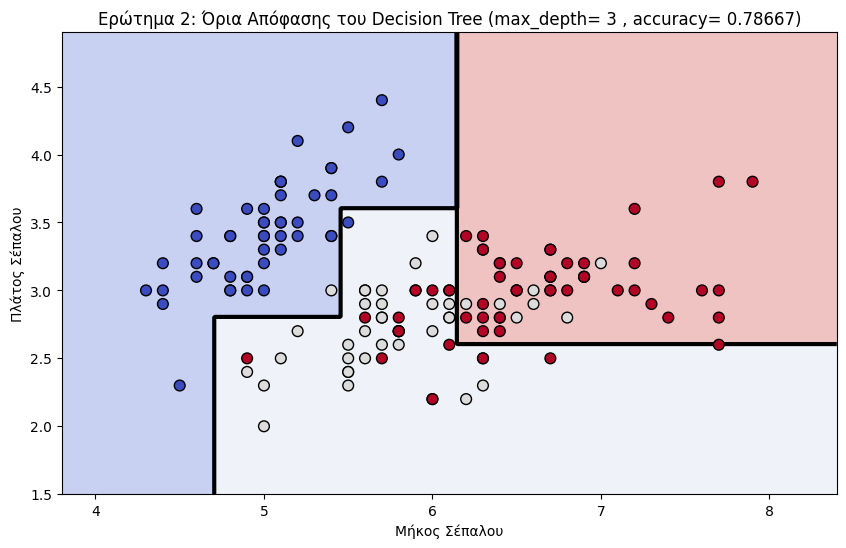

In [12]:
# Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5  # Set the x-axis limits for the plot
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5  # Set the y-axis limits for the plot
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))  # Create a grid for decision boundaries
Z = clf_best.predict(np.c_[xx.ravel(), yy.ravel()])  # Make predictions for all grid points
Z = Z.reshape(xx.shape)  # Reshape the predictions back to a grid format

plt.figure(figsize=(10, 6))

# Plot the decision boundaries with some transparency
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm, zorder=1)  # Set zorder to 1 (behind the scatter)

# Plot the contour lines (black boundary lines)
plt.contour(xx, yy, Z, levels=np.arange(-0.5, 2.5, 1), linewidths=3, colors='black', zorder=2)  # Set zorder to 2

# Scatter plot for the data points(set zorder to 3, which is on top of the decision boundaries)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, zorder=3, s=60)

plt.xlabel('Μήκος Σέπαλου')  # Label for x-axis
plt.ylabel('Πλάτος Σέπαλου')  # Label for y-axis
plt.title(f"Ερώτημα 2: Όρια Απόφασης του Decision Tree (max_depth= {best_depth} , accuracy= {best_accuracy:.5f})")
plt.show()

## 2η Ενότητα : 
### 1ο Ερώτημα :

In [13]:
# ==================== Ενότητα 2 =========================

# Create a RandomForestClassifier
RFC = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    bootstrap=True,  # Use bootstrap sampling
    max_samples=0.5,  # Use 50% of the data for each tree
    random_state=42   # Set random state for reproducibility
)

best_depth = 0
best_accuracy = 0

# Test different depths (1 to 10) for the Random Forest classifier
for depth in range(1, 11):
    RFC.set_params(max_depth=depth)
    RFC.fit(X_train, y_train)  # Train the model on the training data
    y_pred = RFC.predict(X_test)  # Make predictions on the test data
    accuracy = accuracy_score(y_test, y_pred)  # Calculate the accuracy

    # If the current accuracy is better, store the new best accuracy and depth
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_depth = depth

# Train the Random Forest model with the best depth
RFC.set_params(max_depth=best_depth)  # Use the best depth found
RFC.fit(X_train, y_train)

# Print the best accuracy and the corresponding Random Forest model
print(
    f"ΕΝΟΤΗΤΑ 2\nΕρώτημα 1:\nΚαλύτερο ποσοστό ταξινόμησης: {best_accuracy:.5f}\n"
    f"Kαλύτερο μοντέλο: {RFC} ,με βάθος = {best_depth}\n")

ΕΝΟΤΗΤΑ 2
Ερώτημα 1:
Καλύτερο ποσοστό ταξινόμησης: 0.82667
Kαλύτερο μοντέλο: RandomForestClassifier(max_depth=2, max_samples=0.5, random_state=42) ,με βάθος = 2



### 2ο Ερώτημα :

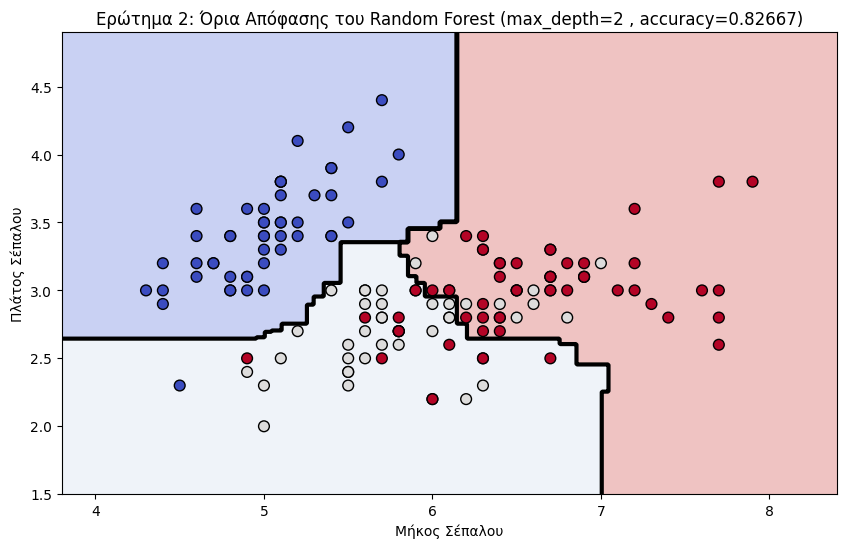

In [14]:
# Plot the decision boundaries for the Random Forest model
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = RFC.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))

# Plot the decision boundaries (with low transparency)
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm, zorder=1)  # Set zorder to 1 (behind the scatter)

# Plot the contour lines (black boundary lines)
plt.contour(xx, yy, Z, levels=np.arange(-0.5, 2.5, 1), linewidths=3, colors='black', zorder=2)  # Set zorder to 2

# Scatter plot for the data points(set zorder to 3, which is on top of the decision boundaries)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm, zorder=3, s=60)

plt.xlabel('Μήκος Σέπαλου')
plt.ylabel('Πλάτος Σέπαλου')
plt.title(f"Ερώτημα 2: Όρια Απόφασης του Random Forest (max_depth={best_depth} , accuracy={best_accuracy:.5f})")
plt.show()

### 3ο Ερώτημα :

Ερώτημα 3:
Accuracy for γ=0.05%: 0.3067
Accuracy for γ=0.5%: 0.3067
Accuracy for γ=1.0%: 0.3067
Accuracy for γ=2.0%: 0.7867
Accuracy for γ=3.0%: 0.7867
Accuracy for γ=4.0%: 0.8267
Accuracy for γ=5.0%: 0.8267
Accuracy for γ=10.0%: 0.8133
Accuracy for γ=20.0%: 0.8000
Accuracy for γ=30.0%: 0.8133
Accuracy for γ=40.0%: 0.8267
Accuracy for γ=50.0%: 0.8267
Accuracy for γ=60.0%: 0.8267
Accuracy for γ=70.0%: 0.8267
Accuracy for γ=80.0%: 0.8267
Accuracy for γ=90.0%: 0.8267
Accuracy for γ=100.0%: 0.8267


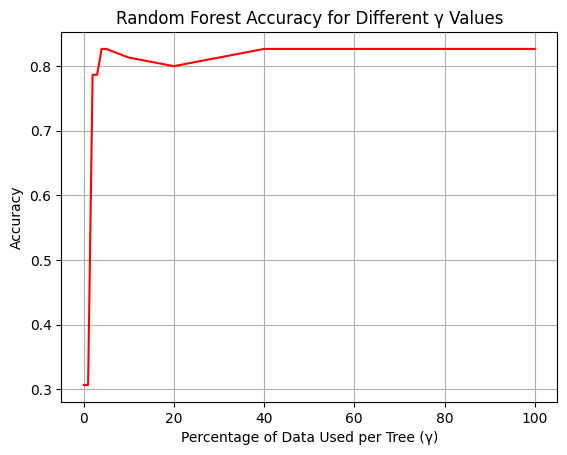

In [15]:
# Define a list of different gamma values (percentage of data used per tree)
gamma_values = [0.0005, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
accuracy_gamma = []  # List to store accuracy results for different gamma values

# Loop over each gamma value and train a RandomForestClassifier
for gamma in gamma_values:

    RFC_1 = RandomForestClassifier(
        random_state=42,
        n_estimators=100,  # 100 trees
        bootstrap=True,    # Enable bootstrap sampling
        max_samples=gamma  # Use gamma percentage of the data for each tree
    )

    best_accuracy = 0
    best_depth = 0

    # Test different depths for each model
    for depth in range(1, 11):
        RFC_1.set_params(max_depth=depth)
        RFC_1.fit(X_train, y_train)  # Train the model
        y_pred = RFC_1.predict(X_test)  # Make predictions
        accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

        # If the current accuracy is better, store the new best accuracy and depth
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = depth

    # Train the best model with the optimal depth
    RFC_1.set_params(max_depth=best_depth)  # Use the best depth found
    RFC_1.fit(X_train, y_train)  # Training
    y_pred = RFC_1.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy

    # Store the accuracy of the best model for the current gamma value
    accuracy_gamma.append(accuracy)

# Print the results for different gamma values
print("Ερώτημα 3:")
for i, gamma in enumerate(gamma_values):
    print(f"Accuracy for γ={gamma*100}%: {accuracy_gamma[i]:.4f}")

# Visualize the accuracy for different gamma values
plt.plot([gamma*100 for gamma in gamma_values], accuracy_gamma, color='r')
plt.title('Random Forest Accuracy for Different γ Values')
plt.xlabel('Percentage of Data Used per Tree (γ)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()